## An analysis on US Credit Complaints

***Francisca Dias***

## Table of Contents

* [Introduction](#Introduction)


* [Libraries](#Libraries)


* [Number of Complaints over time](#NumberofComplaintsovertime)


* [Complaints by Product Type](#ComplaintsbyProductType)


* [Top 10 Financial Institutions with more complaints](#Top10FinancialInstitutionswithmorecomplaints)


* [Proportion of Financial Institution responses to consumers](#ProportionofFinancialInstitutionresponsestoconsumers)


* [Complaint Submission](#ComplaintSubmission)


* [Timely Response](#TimelyResponse)


* [Company Public Response](#CompanyPublicResponse)


* [Plot.ly US map on Number of Complaints by state](#PlotlyUSmaponNumberofComplaintsbystate)

## <a id='introduction'>Introduction</a>

This dataset consists of 555,957 **consumer complaints** on financial products and services from US Financial institutions.

There are **3,605** Financial institutions represented in this dataset.

The purpose of this data analysis is to give a visual essay, and a general overview on the information provided, such as the institutions, the type of consumer complaints, the responses given to consumers and a map overview bases on the zip code,  provided by the great library, plot ly.

**Note**:This dataset was taken from the www.consumerfinance.gov.

## <a id='Libraries'>Libraries</a>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/Users/FranciscaDias/Kaggle_Temporary/***Kaggle_Competions***/3.US_Complaints/us-consumer-finance-complaint-database/consumer_complaints.csv', low_memory=False)
df.head(2)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080


In [3]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

Since this is a time series, I will have to first convert date column into datetime and then set the date as our index. I will also need to sort the dates, since they are not sorted.

In [4]:
df['date_received'] = pd.to_datetime(df['date_received'])

In [5]:
df['year'], df['month'] = df['date_received'].dt.year, df['date_received'].dt.month

In [6]:
df.set_index('date_received', inplace=True)

In [7]:
df = df.sort_index()

Our time series starts in 2011 and goes till 2016.

In [8]:
df.head(3)

,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,year,month
date_received,,,,,,,,,,,,,,,,,,,
2011-12-01,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,TX,77389,NaN,NaN,Referral,12/01/2011,Closed without relief,Yes,No,2270,2011,12
2011-12-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"SunTrust Banks, Inc.",TN,37407,NaN,NaN,Referral,12/01/2011,Closed without relief,Yes,No,2286,2011,12
2011-12-01,Credit card,NaN,Identity theft / Fraud / Embezzlement,NaN,NaN,NaN,JPMorgan Chase & Co.,VA,20115,NaN,NaN,Web,12/06/2011,Closed without relief,Yes,No,2280,2011,12


In [9]:
df.tail(3)

,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,year,month
date_received,,,,,,,,,,,,,,,,,,,
2016-04-25,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,Company believes complaint caused principally ...,"Credit Karma, Inc.",WA,99163,NaN,Consent not provided,Web,04/25/2016,Closed with explanation,Yes,Yes,1893417,2016,4
2016-04-25,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"Bayview Loan Servicing, LLC",MD,206XX,NaN,NaN,Web,04/25/2016,In progress,Yes,No,1894072,2016,4
2016-04-25,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Debt was paid,NaN,Company has responded to the consumer and the ...,"I.C. System, Inc.",DE,19707,Servicemember,Consent not provided,Web,04/25/2016,Closed with explanation,Yes,No,1894419,2016,4


## <a id='NumberofComplaintsovertime'>Number of Complaints over time</a>

In [10]:
df_group_month = df.groupby(['date_received']).product.count().reset_index()

In [11]:
df_group_month.set_index('date_received', inplace=True)

In [12]:
df_group_month = df_group_month['product'].resample('MS').sum()

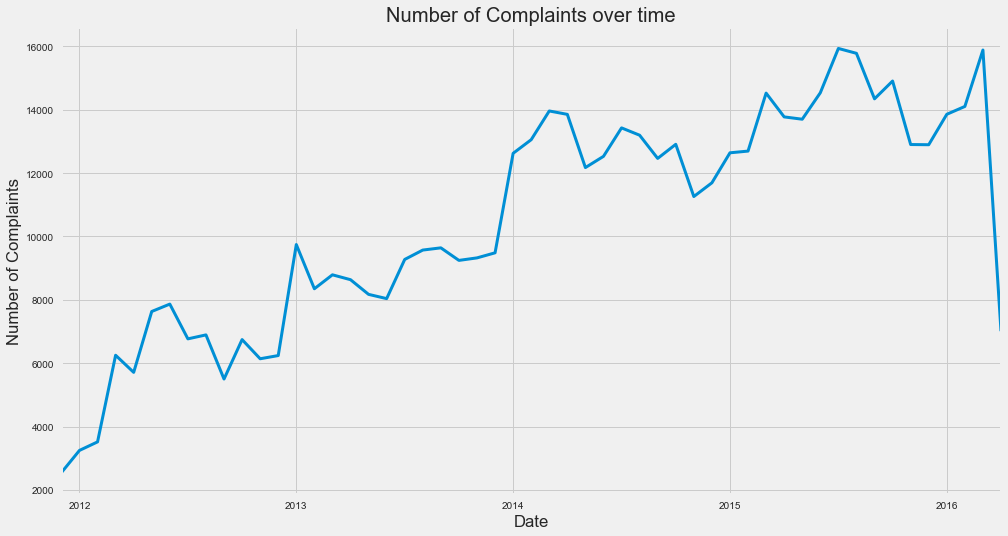

In [13]:
df_group_month.plot(figsize=(15, 8), linewidth=3)
plt.title("Number of Complaints over time")
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.show()

The number of complaints is in an increasing trend since 2012.

By the end of 2012 the number of complaints was about 10,000 and one year later that number increased 30%, to 13,000.

By mid 2015, it hit the highest number, of about 16,000 complaints.

## <a id='ComplaintsbyProductType'>Complaints by Product Type</a>

There are **11** complaint product types represented in this dataset.

By looking at the pie chart, two complaint products pop up by their size : **Mortgage** and **Debt Collection**.

They both represent half of all complaints in this dataset.

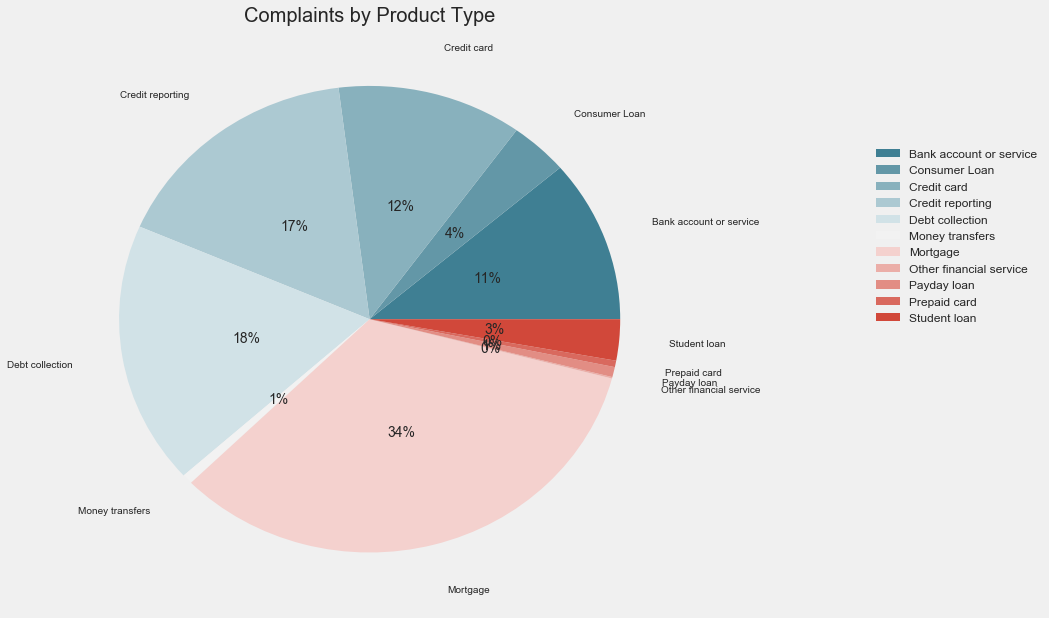

In [14]:
cmap = sns.diverging_palette(220, 15, as_cmap=True)
product_size = df.groupby(['product']).size()
ax = product_size.plot.pie(y='product', figsize=(10, 10), colormap=cmap, autopct='%1.0f%%',pctdistance=0.5, labeldistance=1.2)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.3, 0.8), loc=2, borderaxespad=0., fontsize=12)

plt.ylabel(' ')
plt.title('Complaints by Product Type', fontsize=20)
plt.show();

## <a id='Top10FinancialInstitutionswithmorecomplaints'>Top 10 Financial Institutions with more complaints</a>

* Bank of America is the financial institution with more complaints in this dataset, with almost 60,000 complaints.


* Next comes Wells Fargo with more than 40,000 complaints.


* JP Morgan Chase, Citibank and Capital One also belong to this top 10.

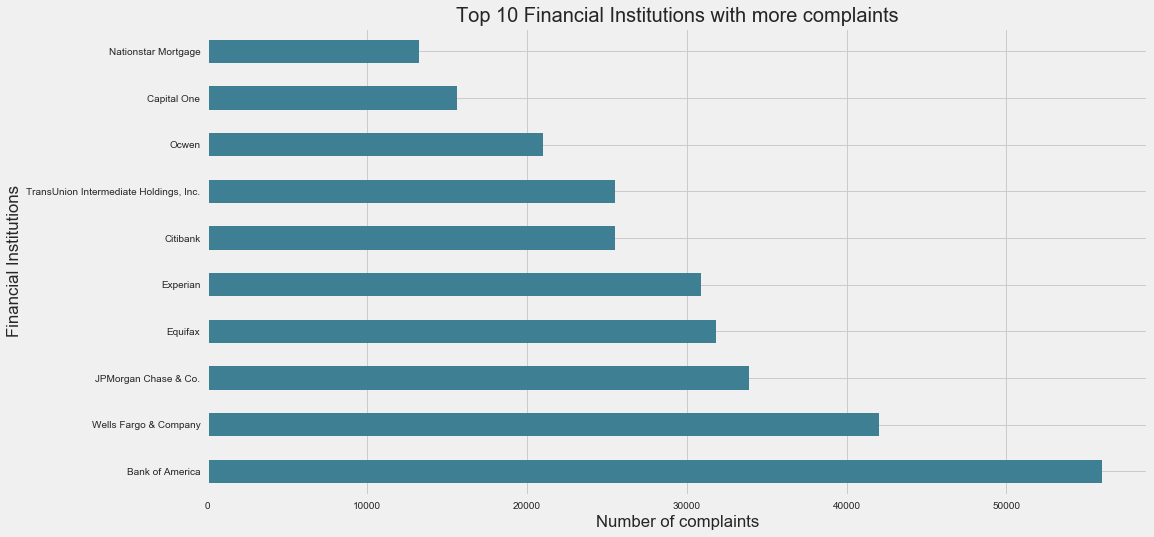

In [15]:
fig = plt.figure(figsize=(15,8))
company_size = df.company.value_counts(ascending=False)
company_size[:10].plot(kind='barh', colormap=cmap)
plt.title('Top 10 Financial Institutions with more complaints', fontsize=20)
plt.xlabel('Number of complaints')
plt.ylabel('Financial Institutions')
plt.show();

## <a id='ProportionofFinancialInstitutionresponsestoconsumers'>Proportion of Financial Institution responses to consumers</a>

* There are 8 types of response by which these financial institutions classify each complaint.


* According to the dataset, more than half of complaints were "closed with explanation".

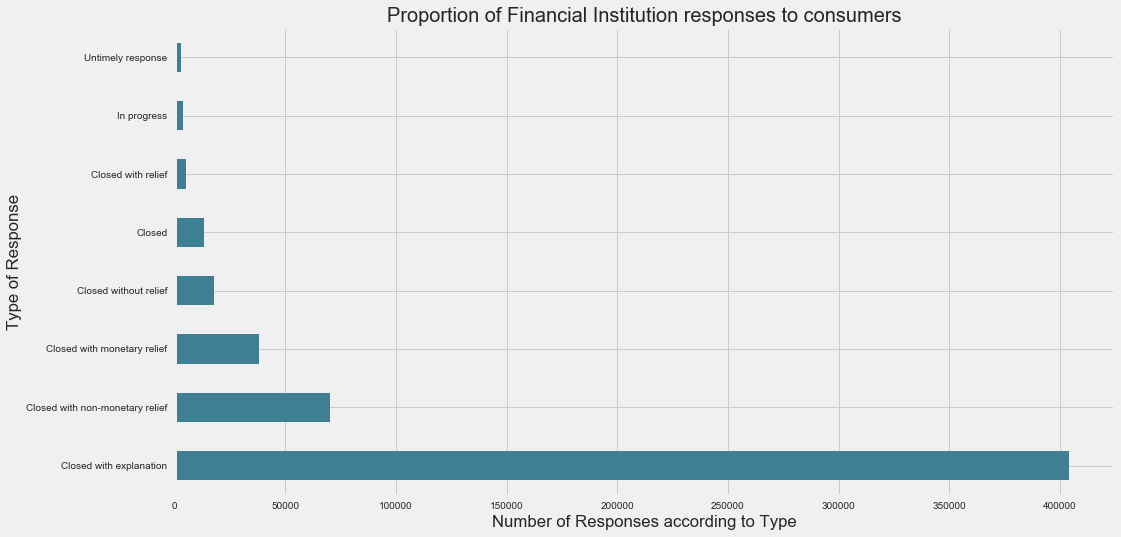

In [16]:
fig = plt.figure(figsize=(15,8))
df_company_response = df.company_response_to_consumer.value_counts()
df_company_response.plot(kind='barh', colormap=cmap)
plt.title('Proportion of Financial Institution responses to consumers', fontsize=20)
plt.xlabel('Number of Responses according to Type')
plt.ylabel('Type of Response')
plt.show();

## <a id='ComplaintSubmission'>Complaint Submission</a>

There are 6 different methods that consumers can submit their complaints.

The most preferred method is via web. Surprisingly email is the least favourite.

In [17]:
df.submitted_via.value_counts()

Web            361338
Referral       109379
Phone           40026
Postal mail     36752
Fax              8118
Email             344
Name: submitted_via, dtype: int64

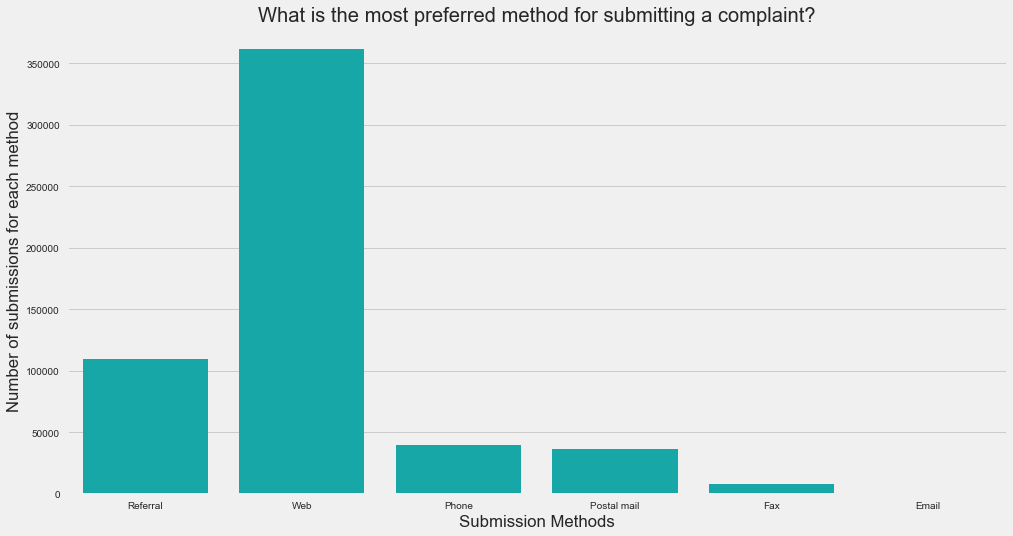

In [18]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="submitted_via", data=df, color="c")
plt.title('What is the most preferred method for submitting a complaint?')
plt.xlabel('Submission Methods')
plt.ylabel('Number of submissions for each method')
plt.show();

## <a id='TimelyResponse'>Timely Response</a>

According to the dataset, 97% of the financial institution response was given in time.

In [19]:
timely_response_df = df.timely_response.value_counts()
timely_response_df

Yes    541909
No      14048
Name: timely_response, dtype: int64

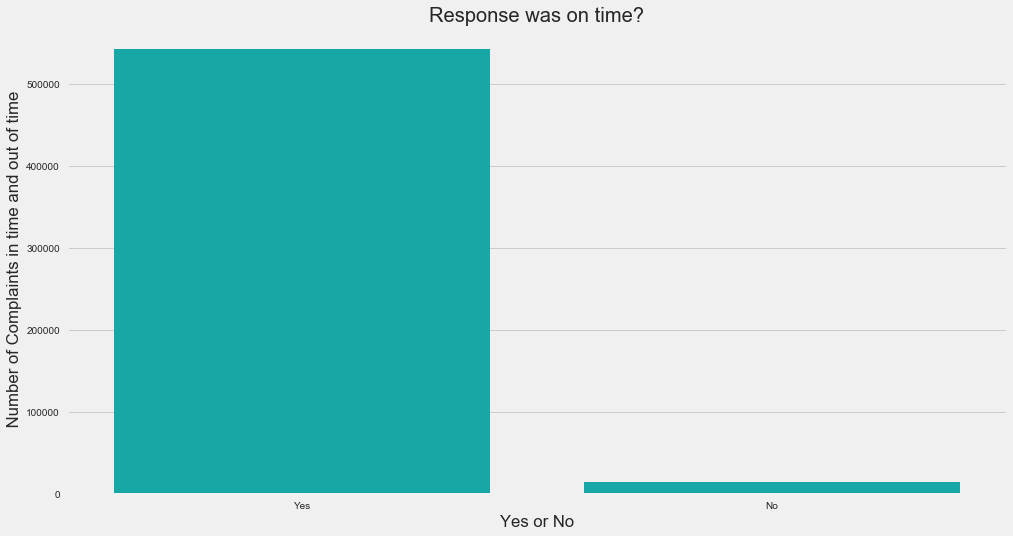

In [20]:
fig = plt.figure(figsize=(15,8))
sns.countplot(x="timely_response", data=df, color="c")
plt.title('Response was on time?')
plt.xlabel('Yes or No')
plt.ylabel(' Number of Complaints in time and out of time')
plt.show();

## <a id='CompanyPublicResponse'>Company Public Response</a>

Below are the responses given by the financial institutions to their consumers.

52,478 financial institutions choose not to provide a public response, out of 85,124. That represents 62% of all responses.       

In [21]:
company_public_response_df =df.company_public_response.value_counts()

**The number of responses is:**

In [22]:
company_public_response_df.sum()

85124

Below is each of the 10 categories that is available on this dataset, and their count for each response:

In [23]:
company_public_response_df

Company chooses not to provide a public response                                                                           52478
Company believes it acted appropriately as authorized by contract or law                                                   15386
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            10426
Company believes complaint caused principally by actions of third party outside the control or direction of the company     1509
Company disputes the facts presented in the complaint                                                                       1395
Company believes the complaint is the result of a misunderstanding                                                          1382
Company can't verify or dispute the facts in the complaint                                                                  1044
Company believes complaint is the result of an isolated error                                    

## <a id='PlotlyUSmaponNumberofComplaintsbystate'>Plot.ly US map on Number of Complaints by state</a>

In [24]:
from plotly.offline import download_plotlyjs, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
new_df = df.groupby(["state"]).size().reset_index(name="Number_Complaints")
for col in new_df.columns:
    new_df[col] = new_df[col].astype(str)

    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

new_df['text'] = new_df['state'] + '<br>' + 'Complaints '+new_df['Number_Complaints']
    

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = new_df['state'], 
        locationmode = 'USA-states',
        z = new_df['Number_Complaints'].astype(float),
        text = new_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Complaints")
        ) ]

layout = dict(
        title = 'Number of Complaints by State<br>',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = False,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )